# Star Type Classification


First, we'll import some libraries that will be useful for later.

In [ ]:
# Graphs and figures
import matplotlib.pyplot as plt
import seaborn as sns

# Data/arrays manipulation
import numpy as np
np.random.seed(0) # for reproducibility
import pandas as pd

# Machine learning !
import sklearn

## Star Type Classification

In this project we will use a dataset collected by [Deepraj Baidya](https://github.com/deepraj1729). It is available at [Kaggle](https://www.kaggle.com/deepu1109/star-dataset). 

This dataset includes information that was collected either from Wikipedia or derived from the laws of physics. As always, each row correspond to a sample (observation) and the features (measurements)  are the columns. There is a totral of 240 stars with the following features:

- Temperature ( in Kelvin )
- Luminosity ( $L/L_{\odot}$ )
- Radius ( $R/R_{\odot}$ )
- Absolute visual magnitude ( $M_v$ )
- Color (Red/Orange/Yellow/White/Blue/…)
- Spectral class ('A', 'B', 'F', 'G', 'K', 'M', 'O')
- Star type (Brown dwarf/Red dwarf/White dwarf/Main sequence/Supergiant/Hypergiant)



The objective of this project is to build a decisional model to categorize stars based on their observed properties. 
From a mathematical point of vew, we want to build a classification function with the form

\begin{equation}
f: (x_1, x_2, ..., x_n) \in \mathbb{R}^n \rightarrow f(x_1, ..., x_n) = y \in \{0, 1, 2, ..., k-1\},
\end{equation}

where

- $(x_1, ..., x_n)$ represent the features, i.e. the observed physical properties such as Temperature, Luminosity, etc.

- $y$ represents the index of the class, i.e. the star type.


### Loading and preprocessing of the data

Since the dataset is a `.csv`file, we will use the `Pandas` package to load and manipulate the data.

1. Download the dataset from the [Kaggle](https://www.kaggle.com/deepu1109/star-dataset).

2. Load the dataset as a dataframe named `df_stars` using `Pandas`.

3. Describe the data. Which features are numerical, which are continuous and which are categorical?

The datframe should look as this:

In [ ]:
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


As stated before, the objective of this project is to train an algorithm that predicts the star type (column 5) based on the physical properties (columns 1, 2, 3, 4, 6 and 7). 


### Encoding the star types

There are 6 star types in the *'Star type'* column. We will call this information the **labels**.

The labels are currently encoded as **strings** which are practical for reading but not for computing. Therefore, we will use the package `scikit-learn` to convert this column into integers by assigning a unique `int` value to each star type. The function `sklearn.preprocessing.LabelEncoder` is used to perform this action.

4. Find information about this function and explain what it does in the following piece of code:

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
class_names = le.classes_
class_names

['Brown Dwarf' 'Hypergiant' 'Main Sequence' 'Red Dwarf' 'Supergiant'
 'White Dwarf']


In [ ]:
labels = le.inverse_transform(df_stars['Star type'])

As we stated above, the objective of thsi project is to build a statistical model that learns how to map the characteristics Temperature/Luminosity/Radius/Absolute magnitude to the Star Type. Since the labels are categorical, this task is called **classification**.

We will use a supervised approach: i.e. we build a model by training it on some examples for which we know the actual labels (this is caleld the **train set**). When the model is ready, we will apply it to another set (**test set**) to check if  it can infer the right star type for this new samples.

### Data analysis

5. As we have seen in the course, a first step in data analysis is to check if

- are there any missing values?
- are there NaNs in the data?
- are some variables redundant (i.e. strongly correlated)?
- is the data distribution skewed somehow?

#### Correlation
In order to study the possible correlation between variables, it is possible ot use the function `.corr()` for dataframes in pandas and the `seaborn.heatmap` function to plot a heat map with the information.

6. Study the information about this functions at

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

and consider the example given in 

https://stackoverflow.com/questions/39409866/correlation-heatmap

to build a heatmap using the correlations between the variables in our dataframe. The result shoukd look the following fgure:





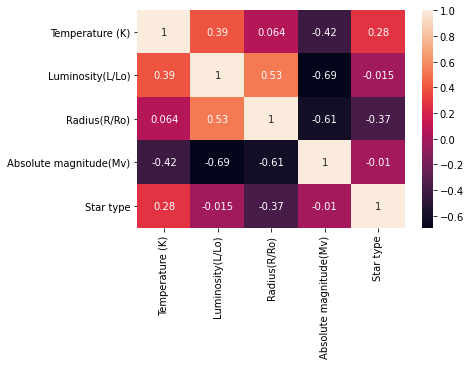

In [ ]:
## Correlation between variable

sns.heatmap( ... ) 

plt.show()

7. What may you conclude from this correlations? Is there a strong correlation between a particular pair of features? 


## The Hertzprung Russell Diagram

Star classification is usually done using temperature and luminosity. This kind of classification is present in the Hertzsprung-Russell diagram:
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/6/6b/HRDiagram.png" >
<\center>

8. Reproduce this diagram using the featueres `'Temperature (K)'`and `'Luminosity(L/Lo)'` in the dataframe. (Remember to use a log-log scale) The result should look as the following figure:

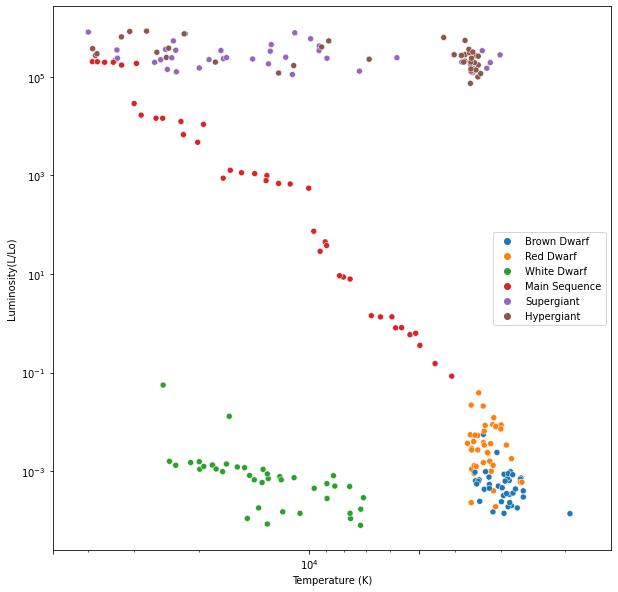

In [ ]:
#Plot
fig = plt.figure(figsize=(10, 10))
...
plt.xscale('log')
...
plt.show()


9. What can you say aboth the llcation of different Star types in the HR-Diagram? Is it possible to recognize each Star Type just with the information in this diagram? 

### Dimension reduction

The second step in data analysis is the  *dimension reduction*. This procedure will reduce the number of features in the dataset in order to achieve

a. visualization by reducing the number of variables to 2 or 3
b. reducing the number of variables for easier data mining.

The fucntion `sklearn.decomposition.PCA` is an algorithm for dimension reduction based on the **Principal Component Analysis** (PCA). This algorithm finds linear combinations of variables that explain most of the variance in the data.

10. Read the documentartion for this function at 

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

and explain how it works.


First, we will importe the module and inizialize it keeping only 2 principal components.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

scikit-learn expects a `NumPy` array as input for the function. Therefore, we will define an array `X` to store the data on which we will perform the PCA.

In [ ]:
df_stars_data = df_stars.drop(columns=["Star color", "Star type", "Spectral Class"])
X = np.array(df_stars_data)

As in other functions of the scikitlearn package, the PCA function is actually papplied using the `.fit()` method on the data. 

11. Apply the PCA to the array `X`and plot the 2-dimensional space that maximizes variance. The result should look like the following figure:

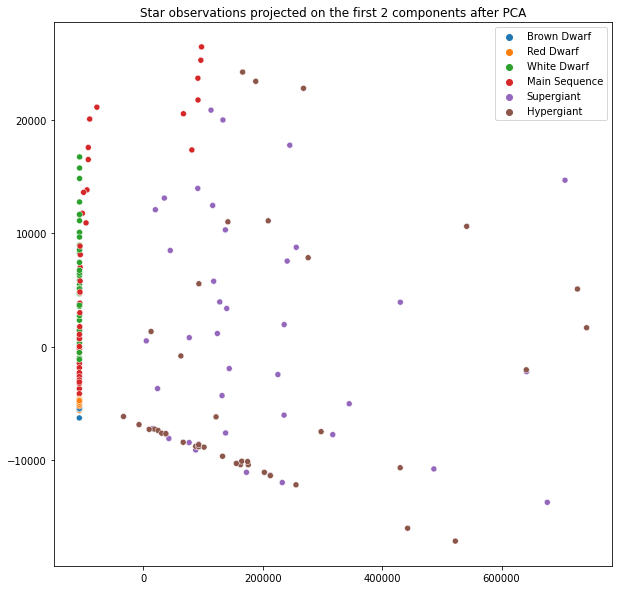

In [ ]:
... = pca.fit .....

fig = plt.figure(figsize=(10, 10))
...
plt.title("Star observations projected on the first 2 components after PCA")
plt.show()

As you can see from the figure, a lot of points are located at the same coordinate x and many stars are distributed in such a way that it is difficult to separate them according to their Star type. The reason of this behavior is that each feature is given in different units and this fact may distort the plot. Hencem we will use the function `sklearn.preprocessing.StandardScaler` to center (mean=0) and normalize(std=1) the data. 

12. Read the docuemntation of the `StandardScaler` function at

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Apply the function the `df_stars_data` dataframe defined above and define the variable `X`. Then, apply the PCA to the variable `X` and plot the result. Your figure should look like the following plot:

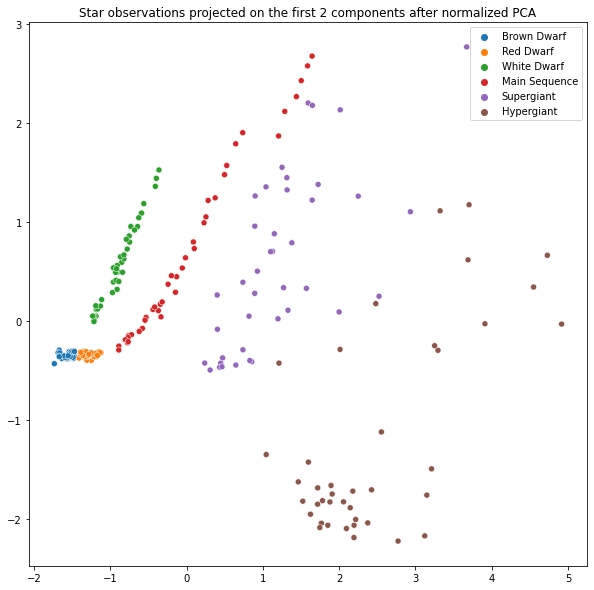

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform....

pca = PCA()

... = pca.fit_transform(....)

fig = plt.figure(figsize=(10, 10))

plt.title("Star observations projected on the first 2 components after normalized PCA")
plt.show()

This figure shows the expected behavior. Note that one can easily recognize the different Star type regions in the plot (in fact there are  *clusters* for each type). 


### Decision tree

Now we will apply a *Decision trees* algorithm from scikit-learn, just as we saw in class:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

13. Split the data set into two subset (train and test) in order to use the `.fit()` method to train the model. 


In [ ]:
# Split the dataset
...

# Train the model 
tree.fit(...)

14. Once you have trained your model, you can check its *accuracy* on our test set. You can use the `.predict()` method, as we have seen in class to obtain the labels for the samples in the test set.

In [ ]:
tree.predict(...)

15. Now you can use the  `.score()` method to obtain a measure of the prediction accuracy

In [ ]:
tree.score(X_test, y_test)

16. How do you interpret the score result? Is it a good model? Is your model able to predict correctly the Star type of an unknown sample?

A confusion matrix together with a heatmap become an interesting tool to illustrate the results. The confusion matrix indicates for each actual star type (rows) how the stars of this group have been predicted (columns). 

17. Read the documentation of this function at

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

and try to generate a heat map similar to this one:


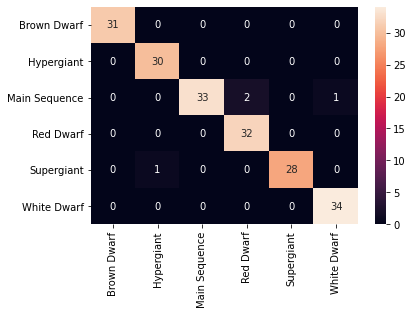

In [ ]:
from sklearn.metrics import confusion_matrix

...
cm = confusion_matrix(...)
...

plt.show()

18. How do you interpret this heatmap? Is it good your model to predict the Star type?

19. If everything works fine, the following code will give a graphical interpretation of the decision tree. Try it and comment the results.

In [ ]:
fig = plt.figure(figsize=(12, 12))
sklearn.tree.plot_tree(tree, filled=True, feature_names=stars_train.drop(columns="Star type").keys(), class_names=class_names)
plt.show()